In [ ]:
#John David Conley
#Deep Learning assignment 6

#ICP_Basics in Keras
#Use Case Description:
#Predicting the diabetes disease
#Programming elements:
#Keras Basics

#In class programming:
#1. Use the use case in the class:
#a. Add more Dense layers to the existing code and check how the accuracy changes.
#2. Change the data source to Breast Cancer dataset * available in the source code folder and make required changes. Report accuracy of the model.
#3. Normalize the data before feeding the data to the model and check how the normalization change your 
#accuracy (code given below).
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#Breast Cancer dataset is designated to predict if a patient has Malignant (M) or Benign = B cancer

#In class programming:
#Use Image Classification on the hand written digits data set (mnist)
#1. Plot the loss and accuracy for both training data and validation data using the history object in the source code.
#2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.
#3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
#4. Run the same code without scaling the images and check the performance?

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [94]:
#1
path_to_csv = '/content/gdrive/My Drive/DeepLearning/diabetes.csv'

import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))


Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 22.9295 - acc: 0.6667
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 13.3626 - acc: 0.6233
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 7.4388 - acc: 0.5677
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 4.2840 - acc: 0.5382
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 2.9432 - acc: 0.6042
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 2.6426 - acc: 0.6181
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 2.4305 - acc: 0.6146
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 2.2389 - acc: 0.6181
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 2.0645 - acc: 0.6146
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.9220 - acc: 0.6163
Epoch 11/100
18/18 [==============================] - 0s 

In [95]:
#a
path_to_csv = '/content/gdrive/My Drive/DeepLearning/diabetes.csv'

import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(40, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))


Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 11.3147 - acc: 0.3698
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 4.3323 - acc: 0.5069
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 2.2051 - acc: 0.4896
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 1.5073 - acc: 0.5729
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 1.1716 - acc: 0.5312
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.9618 - acc: 0.6146
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8766 - acc: 0.6146
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8047 - acc: 0.6389
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7309 - acc: 0.6632
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7299 - acc: 0.6458
Epoch 11/100
18/18 [==============================] - 0s 2

# New Section

In [101]:
#2 - Breast cancer
path_to_csv = '/content/gdrive/My Drive/DeepLearning/breastcancer.csv'
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values
dataset = np.delete(dataset, (0), axis=0)
dataset = np.delete(dataset, (1), axis=1)

dataset = np.asarray(dataset).astype('float32')

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:31], dataset[:,31],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(40, input_dim=31, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 11/100
14/14 [=============================

In [113]:
#3
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_first_nn_scaled = sc.fit_transform(dataset)
my_first_nn_scaled

#print(my_first_nn_scaled.summary())
#print(my_first_nn_scaled.evaluate(X_test, Y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


array([[-0.23640516,  1.0970639 , -2.073335  , ...,  2.750622  ,
         1.9370146 ,         nan],
       [-0.23640344,  1.8298205 , -0.3536323 , ..., -0.24388957,
         0.28118992,         nan],
       [ 0.4317411 ,  1.5798883 ,  0.45618695, ...,  1.1522548 ,
         0.20139137,         nan],
       ...,
       [-0.23572747,  0.7022844 ,  2.045574  , ..., -1.1045489 ,
        -0.3184093 ,         nan],
       [-0.23572516,  1.8383411 ,  2.3364573 , ...,  1.9190829 ,
         2.219635  ,         nan],
       [-0.24240586, -1.8084012 ,  1.2217922 , ..., -0.04813841,
        -0.75120664,         nan]], dtype=float32)

In [114]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 8s 34ms/step - loss: 0.2890 - accuracy: 0.9115 - val_loss: 0.1709 - val_accuracy: 0.9447
Epoch 2/10
235/235 [==============================] - 7s 28ms/step - loss: 0.1019 - accuracy: 0.9689 - val_loss: 0.0906 - val_accuracy: 0.9718
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0636 - accuracy: 0.9795 - val_loss: 0.0716 - val_accuracy: 0.9777
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0778 - val_accuracy: 0.9768
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0608 - val_accuracy: 0.9809
Epoch 6/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0745 - val_accuracy: 0.9776
Epoch 7/10
235/235 [==============================] - 12s 49ms/s

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


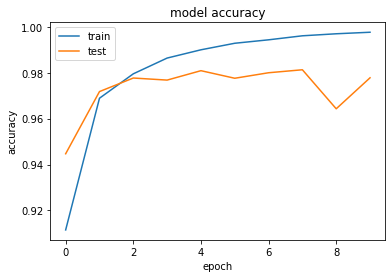

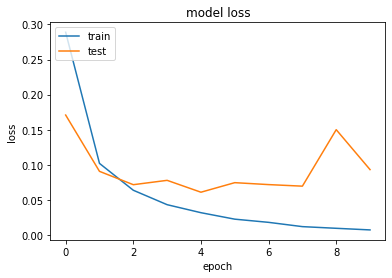

In [125]:
#1
from matplotlib.pylab import plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

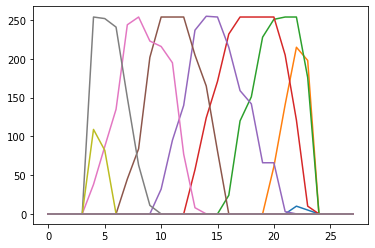

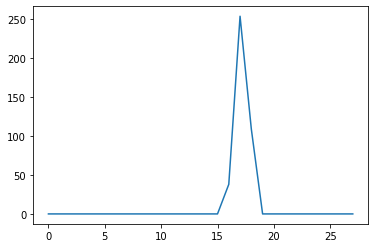

[17,250]


In [147]:
#2
plt.plot(test_images[2])
plt.show()
plt.plot(test_images[2,4])
plt.show()
print("[17,250]")

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 13s 54ms/step - loss: 0.4477 - accuracy: 0.8660 - val_loss: 0.1866 - val_accuracy: 0.9420
Epoch 2/10
235/235 [==============================] - 12s 53ms/step - loss: 0.1600 - accuracy: 0.9511 - val_loss: 0.1393 - val_accuracy: 0.9579
Epoch 3/10
235/235 [==============================] - 11s 48ms/step - loss: 0.1000 - accuracy: 0.9688 - val_loss: 0.1799 - val_accuracy: 0.9449
Epoch 4/10
235/235 [==============================] - 12s 50ms/step - loss: 0.0736 - accuracy: 0.9767 - val_loss: 0.0954 - val_accuracy: 0.9684
Epoch 5/10
235/235 [==============================] - 13s 53ms/step - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.1354 - val_accuracy: 0.9593
Epoch 6/10
235/235 [==============================] - 13s 54ms/step - loss: 0.0360 - accuracy: 0.9884 - val_loss: 0.1386 - val_accuracy: 0.9619
Epoch 7/10
235/235 [==============================] - 13s 54ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0815 - 

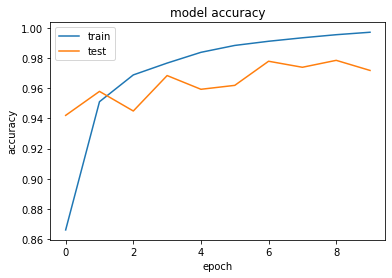

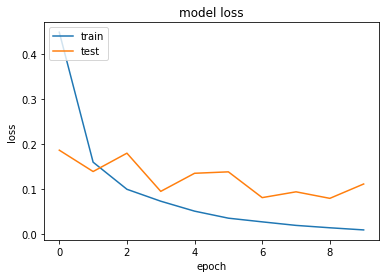

In [152]:
#3
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

from matplotlib.pylab import plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 14s 55ms/step - loss: 0.4961 - accuracy: 0.8522 - val_loss: 0.4152 - val_accuracy: 0.8686
Epoch 2/10
235/235 [==============================] - 13s 54ms/step - loss: 0.2108 - accuracy: 0.9337 - val_loss: 0.2221 - val_accuracy: 0.9285
Epoch 3/10
235/235 [==============================] - 11s 46ms/step - loss: 0.1557 - accuracy: 0.9512 - val_loss: 0.1341 - val_accuracy: 0.9576
Epoch 4/10
235/235 [==============================] - 13s 54ms/step - loss: 0.1273 - accuracy: 0.9599 - val_loss: 0.1757 - val_accuracy: 0.9451
Epoch 5/10
235/235 [==============================] - 13s 54ms/step - loss: 0.1115 - accuracy: 0.9651 - val_loss: 0.1633 - val_accuracy: 0.9503
Epoch 6/10
235/235 [==============================] - 13s 54ms/step - loss: 0.1059 - accuracy: 0.9666 - val_loss: 0.1259 - val_accuracy: 0.9615
Epoch 7/10
235/235 [==============================] - 12s 53ms/step - loss: 0.0914 - accuracy: 0.9704 - val_loss: 0.1244 - 

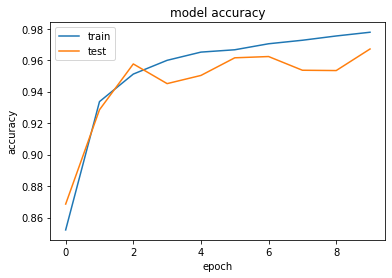

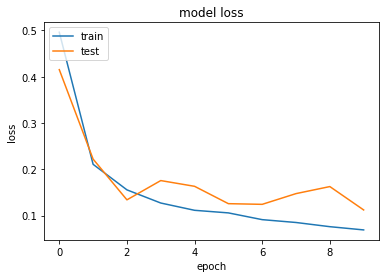

In [151]:
#4
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

from matplotlib.pylab import plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()